<a href="https://colab.research.google.com/github/GeneArguelles/QUANTUM-COMPUTING/blob/main/Qiskit_Sandbox.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install qiskit
!pip install qiskit-aer
!pip install pylatexenc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 23.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.5/37.5 MB 36.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 19.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136818 sha256=bc29a15a720c0e0b323ff903a64553b1e58fe73a7445ab4d5fc5963f30e9d588
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc55

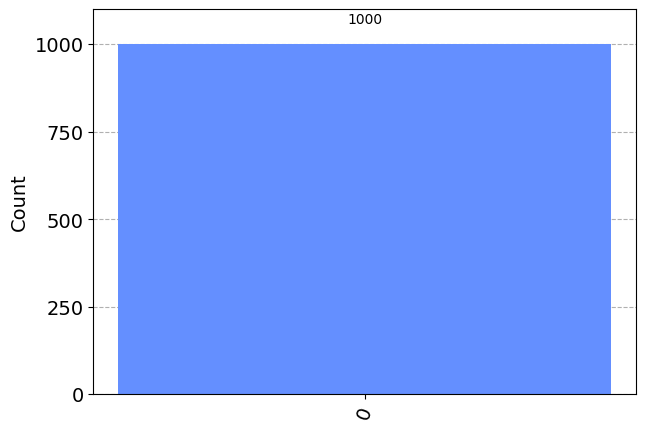

In [2]:
from qiskit import Aer, QuantumCircuit, execute
from qiskit.visualization import plot_histogram

def shor_code_circuit(error_bit_flip, error_phase_flip):
    shor_code = QuantumCircuit(9, 1)

    # Encoding
    shor_code.cx(0, 3)
    shor_code.cx(0, 6)
    shor_code.h([0, 3, 6])
    shor_code.cx(0, 1)
    shor_code.cx(0, 2)
    shor_code.cx(3, 4)
    shor_code.cx(3, 5)
    shor_code.cx(6, 7)
    shor_code.cx(6, 8)

    # Introduce error: bit flip and/or phase flip
    if error_bit_flip:
        shor_code.x(error_bit_flip)
    if error_phase_flip:
        shor_code.z(error_phase_flip)

    # Error correction
    shor_code.cx(0, 1)
    shor_code.cx(0, 2)
    shor_code.ccx(2, 1, 0)
    shor_code.cx(3, 4)
    shor_code.cx(3, 5)
    shor_code.ccx(5, 4, 3)
    shor_code.cx(6, 7)
    shor_code.cx(6, 8)
    shor_code.ccx(8, 7, 6)
    shor_code.h([0, 3, 6])
    shor_code.cx(0, 3)
    shor_code.cx(0, 6)
    shor_code.ccx(6, 3, 0)

    # Measurement
    shor_code.measure(0, 0)

    return shor_code

# Introduce errors (change indices for bit flip and phase flip errors)
shor_code = shor_code_circuit(error_bit_flip=1, error_phase_flip=7)

# Execute the quantum circuit on the simulator
backend = Aer.get_backend('qasm_simulator')
job = execute(shor_code, backend, shots=1000)
result = job.result()
counts = result.get_counts(shor_code)

# Plot the result
plot_histogram(counts)